## 중고차 가격 예측을 위한 모델링에 필요한 데이터 전처리

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
car_df = pd.read_csv('car_details.csv')

In [4]:
car_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


### 자료형 확인 & 자료형을 숫자 형태로 변환

In [5]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [6]:
# mileage 컬럼 데이터에서 kmpl 문자 제거하고 숫자 부분만 저장
car_df['mileage'] = car_df['mileage'].str.replace('kmpl','')

In [7]:
# engine 컬럼 데이터에서 CC 문자 제거하고 숫자 부분만 저장
car_df['engine'] = car_df['engine'].str.replace('CC','')

In [8]:
# engine 컬럼 데이터에서 CC 문자 제거하고 숫자 부분만 저장
car_df['max_power'] = car_df['max_power'].str.replace('bhp','')

In [9]:
car_df['mileage'].head(10)

0         23.4 
1        21.14 
2         17.7 
3         23.0 
4         16.1 
5        20.14 
6    17.3 km/kg
7         16.1 
8        23.59 
9         20.0 
Name: mileage, dtype: object

In [10]:
# mileage 컬럼에 km/kg 로 단위가 다른 컬럼 발견
# 다시 제거하고 숫자 부분만 저장
car_df['mileage'] = car_df['mileage'].str.replace(' km/kg','')

In [11]:
car_df['mileage'].head(10)

0     23.4 
1    21.14 
2     17.7 
3     23.0 
4     16.1 
5    20.14 
6      17.3
7     16.1 
8    23.59 
9     20.0 
Name: mileage, dtype: object

In [12]:
car_df['engine'] = pd.to_numeric(car_df['engine'])

In [13]:
car_df['max_power'] = car_df['max_power'].str.replace(' ','')

In [14]:
car_df['max_power'] = pd.to_numeric(car_df['max_power'])

In [15]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   float64
 10  max_power      7912 non-null   float64
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 825.6+ KB


### torque 컬럼의 두 개의 숫자형 컬럼으로 나누기

In [16]:
car_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [17]:
car_df['torque'].str.split(n=2, expand = True).tail(10)

,0,1,2
8118,113.7Nm@,4000rpm,None
8119,90Nm@,3500rpm,None
8120,96.1Nm@,3000rpm,None
8121,90Nm@,3500rpm,None
8122,219.7Nm@,1500-2750rpm,None
8123,113.7Nm@,4000rpm,None
8124,24@,"1,900-2,750(kgm@",rpm)
8125,190Nm@,2000rpm,None
8126,140Nm@,1800-3000rpm,None
8127,140Nm@,1800-3000rpm,None


In [18]:
# Dirty Data...
# 소문자로 변환

car_df['torque'] = car_df['torque'].str.lower()

In [19]:
car_df['temp_torque'] = car_df['torque'].str.split(expand = True)[0]

In [20]:
car_df.head(50)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,temp_torque
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.00,190nm@ 2000rpm,5.0,190nm@
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250nm@ 1500-2500rpm,5.0,250nm@
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,12.7@
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,22.4
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,11.5@
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75nm@ 4000rpm,5.0,113.75nm@
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3,1061.0,57.50,"7.8@ 4,500(kgm@ rpm)",5.0,7.8@
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1,796.0,37.00,59nm@ 2500rpm,4.0,59nm@
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364.0,67.10,170nm@ 1800-2400rpm,5.0,170nm@
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0,1399.0,68.10,160nm@ 2000rpm,5.0,160nm@


In [21]:
car_df['temp_torque'] = car_df['temp_torque'].str.split('n').str[0]

In [22]:
car_df['temp_torque'] = car_df['temp_torque'].str.split('@').str[0]

In [23]:
car_df['temp_torque'] = car_df['temp_torque'].str.split('kgm').str[0]

In [24]:
car_df['temp_torque'] = car_df['temp_torque'].str.split('(').str[0].astype(float)

In [25]:
car_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,temp_torque
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.00,190nm@ 2000rpm,5.0,190.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250nm@ 1500-2500rpm,5.0,250.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,12.7
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,22.4
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,11.5


In [26]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   float64
 10  max_power      7912 non-null   float64
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
 13  temp_torque    7906 non-null   float64
dtypes: float64(4), int64(3), object(7)
memory usage: 889.1+ KB


## 결측치 제거

In [27]:
car_df.isna().mean()

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          0.027190
engine           0.027190
max_power        0.026575
torque           0.027313
seats            0.027190
temp_torque      0.027313
dtype: float64

In [28]:
car_df.describe()

,year,selling_price,km_driven,engine,max_power,seats,temp_torque
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7912.000000,7907.000000,7906.000000
mean,2013.804011,6.382718e+05,6.981951e+04,1458.625016,91.517919,5.416719,168.294141
std,4.044249,8.062534e+05,5.655055e+04,503.916303,35.822499,0.959588,97.313384
min,1983.000000,2.999900e+04,1.000000e+00,624.000000,0.000000,2.000000,4.800000
25%,2011.000000,2.549990e+05,3.500000e+04,1197.000000,68.050000,5.000000,101.000000
50%,2015.000000,4.500000e+05,6.000000e+04,1248.000000,82.000000,5.000000,154.900000
75%,2017.000000,6.750000e+05,9.800000e+04,1582.000000,102.000000,5.000000,202.000000
max,2020.000000,1.000000e+07,2.360457e+06,3604.000000,400.000000,14.000000,789.000000


In [29]:
# 결측치가 포함된 컬럼의 개수를 데이터마다 계산하여 na_values 컬럼에 저장

car_df['na_values'] = car_df.isna().sum(axis = 1)

In [30]:
car_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,temp_torque,na_values
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.00,190nm@ 2000rpm,5.0,190.0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250nm@ 1500-2500rpm,5.0,250.0,0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,12.7,0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,22.4,0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,11.5,0


In [31]:
len(car_df[car_df['na_values'] >= 4])

221

In [32]:
# na_values 컬럼의 값이 4 이상인 데이터 제거

car_df = (car_df[car_df['na_values'] < 4])

In [33]:
# na_values 컬럼 제거

car_df.drop('na_values', axis = 1, inplace = True)

In [34]:
car_df.isna().mean()

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          0.000000
engine           0.000000
max_power        0.000126
torque           0.000126
seats            0.000000
temp_torque      0.000126
dtype: float64

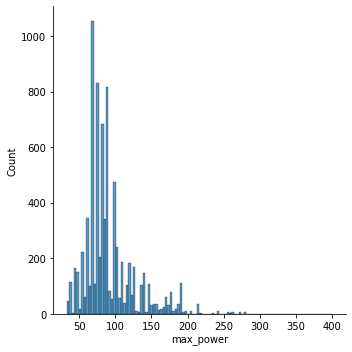

In [35]:
sns.displot(car_df['max_power'])

In [36]:
car_df['max_power'].mean()

91.58737351378699

In [37]:
car_df['max_power'].median()

82.0

In [38]:
# 중앙값으로 결측치를 채우기
car_df = car_df.fillna(car_df.median(numeric_only=True))

In [39]:
car_df.isna().mean()

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          0.000000
engine           0.000000
max_power        0.000000
torque           0.000126
seats            0.000000
temp_torque      0.000000
dtype: float64

In [40]:
car_df[car_df['torque'].isna()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,temp_torque
4933,Maruti Omni CNG,2000,80000,100000,CNG,Individual,Manual,Second Owner,10.9,796.0,82.0,NaN,8.0,154.9


In [41]:
car_df.dropna(subset=['torque'], inplace=True)

In [42]:
has_kg = car_df['torque'].str.contains('kg')

In [43]:
car_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,temp_torque
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.00,190nm@ 2000rpm,5.0,190.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250nm@ 1500-2500rpm,5.0,250.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,12.7
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,22.4
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,11.5


In [44]:
car_df['torque']

0                  190nm@ 2000rpm
1             250nm@ 1500-2500rpm
2           12.7@ 2,700(kgm@ rpm)
3        22.4 kgm at 1750-2750rpm
4           11.5@ 4,500(kgm@ rpm)
                  ...            
8123             113.7nm@ 4000rpm
8124    24@ 1,900-2,750(kgm@ rpm)
8125               190nm@ 2000rpm
8126          140nm@ 1800-3000rpm
8127          140nm@ 1800-3000rpm
Name: torque, Length: 7906, dtype: object

In [45]:
has_kg = car_df['torque'].str.contains('kg')

In [46]:
car_df.loc[has_kg, 'temp_torque'] = car_df.loc[has_kg, 'temp_torque'] * 9.8

In [47]:
car_df['temp_torque'] = car_df['temp_torque'].round(1)

In [48]:
car_df.drop('torque', axis=1, inplace=True)

In [49]:
car_df.rename(columns={'temp_torque': 'torque'}, inplace=True)

In [50]:
car_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.00,5.0,190.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,250.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497.0,78.00,5.0,124.5
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90.00,5.0,219.5
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298.0,88.20,5.0,112.7


In [51]:
car_df['name'].nunique()

1982

In [57]:
car_df['name'] = car_df['name'].str.split(expand=True)[0]

In [58]:
car_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque,brand
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.00,5.0,190.0,Maruti
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,250.0,Skoda
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497.0,78.00,5.0,124.5,Honda
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90.00,5.0,219.5,Hyundai
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298.0,88.20,5.0,112.7,Maruti


In [56]:
car_df['brand'].nunique()

31

In [59]:
car_df.drop('brand', axis = 1, inplace = True)

In [63]:
# 컬럼명 변경

car_df.rename({'name':'brand'},axis = 1, inplace = True)

In [70]:
car_df['transmission'].value_counts()

Manual       6865
Automatic    1041
Name: transmission, dtype: int64

In [71]:
car_df['owner'].nunique()

5

In [72]:
car_df['owner'].value_counts()

First Owner             5215
Second Owner            2016
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: owner, dtype: int64

In [73]:
car_df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.00,5.0,190.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,250.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497.0,78.00,5.0,124.5
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90.00,5.0,219.5
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298.0,88.20,5.0,112.7


In [74]:
car_df.describe()

,year,selling_price,km_driven,engine,max_power,seats,torque
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,1458.708829,91.587374,5.416393,181.015849
std,3.863695,8.135827e+05,5.679230e+04,503.893057,35.747216,0.959208,116.246605
min,1994.000000,2.999900e+04,1.000000e+00,624.000000,32.800000,2.000000,47.000000
25%,2012.000000,2.700000e+05,3.500000e+04,1197.000000,68.050000,5.000000,111.800000
50%,2015.000000,4.500000e+05,6.000000e+04,1248.000000,82.000000,5.000000,170.000000
75%,2017.000000,6.900000e+05,9.542500e+04,1582.000000,102.000000,5.000000,209.000000
max,2020.000000,1.000000e+07,2.360457e+06,3604.000000,400.000000,14.000000,3724.000000


In [76]:
car_df['selling_price'].sort_values()

5714       29999
2145       30000
5965       31000
1926       31504
4811       33351
          ...   
4766     6000000
4950     6223000
4952     6523000
2938     7200000
170     10000000
Name: selling_price, Length: 7906, dtype: int64

In [77]:
car_df['km_driven'].sort_values()

7913          1
7589       1000
399        1000
6638       1000
7429       1000
         ...   
6673     500000
3641     500000
3508     577414
1810    1500000
3486    2360457
Name: km_driven, Length: 7906, dtype: int64

In [83]:
car_df = car_df[car_df['km_driven'] != 1]

In [84]:
car_df.describe()

,year,selling_price,km_driven,engine,max_power,seats,torque
count,7905.000000,7.905000e+03,7.905000e+03,7905.000000,7905.000000,7905.000000,7905.000000
mean,2013.984314,6.498695e+05,6.919741e+04,1458.742062,91.589725,5.416445,181.025971
std,3.863794,8.136191e+05,5.679056e+04,503.916267,35.748866,0.959257,116.250474
min,1994.000000,2.999900e+04,1.000000e+03,624.000000,32.800000,2.000000,47.000000
25%,2012.000000,2.700000e+05,3.500000e+04,1197.000000,68.050000,5.000000,111.800000
50%,2015.000000,4.500000e+05,6.000000e+04,1248.000000,82.000000,5.000000,170.000000
75%,2017.000000,6.900000e+05,9.550000e+04,1582.000000,102.000000,5.000000,209.000000
max,2020.000000,1.000000e+07,2.360457e+06,3604.000000,400.000000,14.000000,3724.000000


In [85]:
car_df['engine'].sort_values()

6817     624.0
1425     624.0
4388     624.0
2770     624.0
6532     624.0
         ...  
7703    3604.0
5248    3604.0
1860    3604.0
134     3604.0
3239    3604.0
Name: engine, Length: 7905, dtype: float64

In [86]:
car_df['max_power'].sort_values()

6007     32.8
3466     32.8
2453     34.2
4643     34.2
289      34.2
        ...  
1564    280.0
3239    280.0
5248    280.0
148     282.0
170     400.0
Name: max_power, Length: 7905, dtype: float64

In [87]:
car_df[car_df['max_power'] == 400]

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque
170,Volvo,2017,10000000,30000,Petrol,Individual,Automatic,First Owner,42.0,1969.0,400.0,4.0,640.0


In [88]:
car_df['seats'].sort_values()

5900     2.0
6629     2.0
5714     4.0
7624     4.0
4178     4.0
        ... 
4112    10.0
5712    10.0
2086    10.0
4998    10.0
4575    14.0
Name: seats, Length: 7905, dtype: float64

In [91]:
car_df['torque'].sort_values()

5878      47.0
2770      48.0
1267      48.0
709       48.0
8089      48.0
         ...  
4149    1421.0
2289    1421.0
1211    1421.0
5415    1862.0
778     3724.0
Name: torque, Length: 7905, dtype: float64

In [92]:
# torque 가 적합한 수치인지 확인

car_df.sort_values(by='torque', ascending=False)

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque
778,Ford,2013,1075000,110000,Diesel,Individual,Automatic,Third Owner,12.8,2953.0,156.00,7.0,3724.0
5415,Tata,2005,225000,188000,Diesel,Individual,Manual,First Owner,12.3,1948.0,90.00,7.0,1862.0
4149,Maruti,2009,150000,110000,Petrol,Individual,Manual,First Owner,15.0,1586.0,104.68,5.0,1421.0
4987,Maruti,2010,300000,50000,Petrol,Individual,Manual,First Owner,15.0,1586.0,104.68,5.0,1421.0
7743,Maruti,2009,250000,125876,Petrol,Individual,Manual,Second Owner,15.0,1586.0,104.68,5.0,1421.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2770,Tata,2009,70000,15000,Petrol,Individual,Manual,First Owner,26.0,624.0,35.00,4.0,48.0
709,Tata,2011,45000,10000,Petrol,Individual,Manual,Third Owner,26.0,624.0,35.00,4.0,48.0
7624,Tata,2011,70000,80000,Petrol,Individual,Manual,First Owner,26.0,624.0,35.00,4.0,48.0
8089,Tata,2011,46000,25000,Petrol,Individual,Manual,Second Owner,26.0,624.0,35.00,4.0,48.0


<AxesSubplot:xlabel='torque', ylabel='selling_price'>

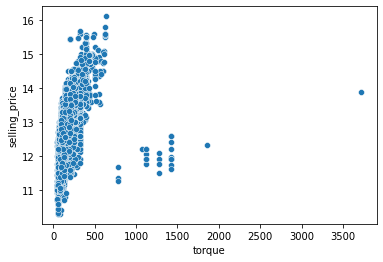

In [97]:
sns.scatterplot( x= car_df['torque'], y = np.log(car_df['selling_price']))

<AxesSubplot:xlabel='year', ylabel='selling_price'>

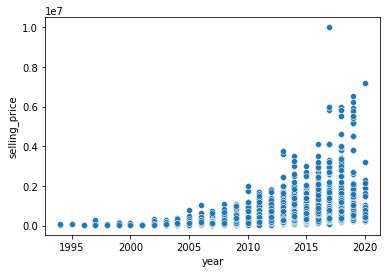

In [98]:
sns.scatterplot( x= car_df['year'], y = car_df['selling_price'])

<AxesSubplot:xlabel='km_driven', ylabel='selling_price'>

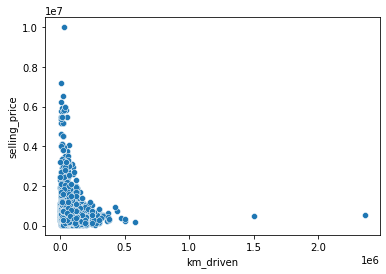

In [99]:
sns.scatterplot( x= car_df['km_driven'], y = car_df['selling_price'])

<AxesSubplot:xlabel='mileage', ylabel='selling_price'>

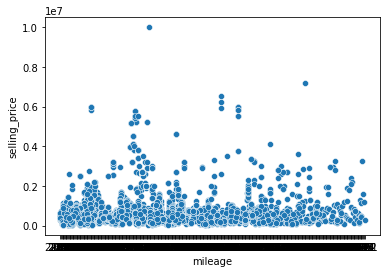

In [101]:
sns.scatterplot( x= car_df['mileage'], y = car_df['selling_price'])

<AxesSubplot:xlabel='engine', ylabel='selling_price'>

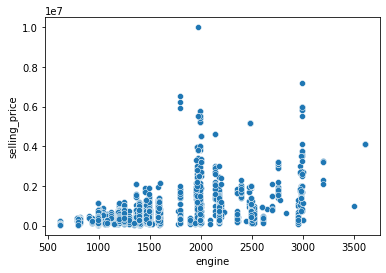

In [102]:
sns.scatterplot( x= car_df['engine'], y = car_df['selling_price'])

<AxesSubplot:xlabel='max_power', ylabel='selling_price'>

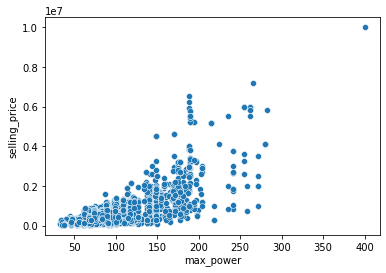

In [103]:
sns.scatterplot( x= car_df['max_power'], y = car_df['selling_price'])

<AxesSubplot:xlabel='seats', ylabel='selling_price'>

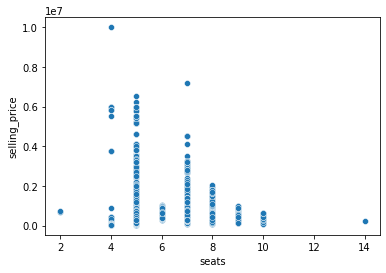

In [104]:
sns.scatterplot( x= car_df['seats'], y = car_df['selling_price'])

## scaler

In [106]:
car_df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.00,5.0,190.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,250.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497.0,78.00,5.0,124.5
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90.00,5.0,219.5
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298.0,88.20,5.0,112.7


In [108]:
car_df[['brand','fuel','seller_type','transmission','owner']].nunique()

brand           31
fuel             4
seller_type      3
transmission     2
owner            5
dtype: int64

In [109]:
car_df['brand'].value_counts()

Maruti           2366
Hyundai          1360
Mahindra          758
Tata              719
Honda             466
Toyota            452
Ford              388
Chevrolet         230
Renault           228
Volkswagen        185
BMW               118
Skoda             104
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               41
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Name: brand, dtype: int64

In [123]:
car_df.groupby('brand')['selling_price'].mean().astype(int)

brand
Ambassador        124000
Ashok             300000
Audi             2612199
BMW              4153813
Chevrolet         273867
Daewoo             77000
Datsun            314599
Fiat              317195
Force             887500
Ford              520873
Honda             596920
Hyundai           473280
Isuzu            1942000
Jaguar           2915464
Jeep             2149612
Kia              1504500
Land             3608333
Lexus            5150000
MG               1783333
Mahindra          630021
Maruti            409095
Mercedes-Benz    2470444
Mitsubishi        817500
Nissan            465407
Opel               68000
Renault           462618
Skoda             609721
Tata              361853
Toyota           1011920
Volkswagen        489891
Volvo            3272014
Name: selling_price, dtype: int64

In [126]:
pd.DataFrame(car_df['brand'].value_counts()).join(car_df.groupby('brand')['selling_price'].mean().astype(int))

,brand,selling_price
Maruti,2366,409095
Hyundai,1360,473280
Mahindra,758,630021
Tata,719,361853
Honda,466,596920
Toyota,452,1011920
Ford,388,520873
Chevrolet,230,273867
Renault,228,462618
Volkswagen,185,489891


In [128]:
# 원-핫 인코딩 적용 -- 첫번째 범주 제외함

pd.get_dummies(car_df, drop_first = True)

,year,selling_price,km_driven,engine,max_power,seats,torque,brand_Ashok,brand_Audi,brand_BMW,...,mileage_28.09,mileage_28.4,mileage_30.46,mileage_32.26,mileage_32.52,mileage_33.0,mileage_33.44,mileage_42.0,mileage_9.0,mileage_9.5
0,2014,450000,145500,1248.0,74.00,5.0,190.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014,370000,120000,1498.0,103.52,5.0,250.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2006,158000,140000,1497.0,78.00,5.0,124.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010,225000,127000,1396.0,90.00,5.0,219.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2007,130000,120000,1298.0,88.20,5.0,112.7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,1197.0,82.85,5.0,113.7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8124,2007,135000,119000,1493.0,110.00,5.0,235.2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8125,2009,382000,120000,1248.0,73.90,5.0,190.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8126,2013,290000,25000,1396.0,70.00,5.0,140.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
car_df.info() # mileage가 object였다니...

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7905 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          7905 non-null   object 
 1   year           7905 non-null   int64  
 2   selling_price  7905 non-null   int64  
 3   km_driven      7905 non-null   int64  
 4   fuel           7905 non-null   object 
 5   seller_type    7905 non-null   object 
 6   transmission   7905 non-null   object 
 7   owner          7905 non-null   object 
 8   mileage        7905 non-null   object 
 9   engine         7905 non-null   float64
 10  max_power      7905 non-null   float64
 11  seats          7905 non-null   float64
 12  torque         7905 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 864.6+ KB


In [132]:
car_df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.00,5.0,190.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,250.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497.0,78.00,5.0,124.5
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90.00,5.0,219.5
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298.0,88.20,5.0,112.7


In [138]:
car_df['mileage'] = car_df['mileage'].astype(float)

In [145]:
car_df = pd.get_dummies(car_df, drop_first = True)

In [153]:
from sklearn.preprocessing import StandardScaler

In [154]:
ss = StandardScaler()

In [155]:
ss.fit(car_df) # fit > 학습

StandardScaler()

In [156]:
car_df.columns

Index(['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power',
       'seats', 'torque', 'brand_Ashok', 'brand_Audi', 'brand_BMW',
       'brand_Chevrolet', 'brand_Daewoo', 'brand_Datsun', 'brand_Fiat',
       'brand_Force', 'brand_Ford', 'brand_Honda', 'brand_Hyundai',
       'brand_Isuzu', 'brand_Jaguar', 'brand_Jeep', 'brand_Kia', 'brand_Land',
       'brand_Lexus', 'brand_MG', 'brand_Mahindra', 'brand_Maruti',
       'brand_Mercedes-Benz', 'brand_Mitsubishi', 'brand_Nissan', 'brand_Opel',
       'brand_Renault', 'brand_Skoda', 'brand_Tata', 'brand_Toyota',
       'brand_Volkswagen', 'brand_Volvo', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual', 'owner_Fourth & Above Owner',
       'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')

In [161]:
car_df = pd.DataFrame(ss.transform(car_df), columns = car_df.columns)

In [162]:
from sklearn.decomposition import PCA

In [177]:
for i in range(5, 16):
    pca = PCA(i)
    pca.fit(car_df)
    print(i, round(pca.explained_variance_ratio_.sum(), 2))

SyntaxError: invalid syntax (2387783030.py, line 1)

In [171]:
from sklearn.preprocessing import RobustScaler

In [172]:
rs = RobustScaler()

In [173]:
rs.fit(car_df) # fit >> 학습을 시킴

RobustScaler()

In [174]:
rs_df = pd.DataFrame(rs.transform(car_df), columns = car_df.columns)

In [175]:
rs_df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats,torque,brand_Ashok,brand_Audi,...,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,...,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,-0.203137,0.475880,0.152023,0.021734,0.547382,0.282466,0.434160,0.113436,0.011248,0.071315,...,-0.456167,0.066688,0.445288,-0.452397,0.175423,-0.389437,0.143272,0.255028,0.025158,0.262613
std,0.772759,1.937188,0.938687,0.728561,1.308873,1.052986,1.000063,1.195993,1.000063,1.000063,...,0.498106,1.000063,0.497029,1.000063,1.000063,1.000063,1.000063,0.435905,1.000063,1.000063
min,-4.200000,-1.000002,-0.975207,-3.483755,-1.620779,-1.449190,-3.127617,-1.265432,0.000000,0.000000,...,-1.000000,0.000000,0.000000,-2.662844,0.000000,-2.957249,0.000000,0.000000,0.000000,0.000000
25%,-0.600000,-0.428571,-0.413223,-0.454874,-0.132468,-0.410898,0.000000,-0.598765,0.000000,0.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.400000,0.571429,0.586777,0.545126,0.867532,0.589102,0.000000,0.401235,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,22.738095,38.024083,4.097473,6.119481,9.366716,9.382851,36.563786,88.915691,14.093619,...,0.000000,15.061925,1.000000,0.000000,5.875929,0.000000,7.123027,1.000000,39.774372,4.070499


In [176]:
rs.fit_transform(car_df)

array([[-0.2       ,  0.        ,  1.41322314, ...,  0.        ,
         0.        ,  0.        ],
       [-0.2       , -0.19047619,  0.99173554, ...,  1.        ,
         0.        ,  0.        ],
       [-1.8       , -0.6952381 ,  1.32231405, ...,  0.        ,
         0.        ,  4.07049942],
       ...,
       [-1.2       , -0.16190476,  0.99173554, ...,  0.        ,
         0.        ,  0.        ],
       [-0.4       , -0.38095238, -0.5785124 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.4       , -0.38095238, -0.5785124 , ...,  0.        ,
         0.        ,  0.        ]])